In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

get the data and preprocess it

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('The current size of our dataset is : \nX_train -> ',X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' , X_test.shape,'\ny_test' , y_test.shape )


The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [4]:
def plot_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

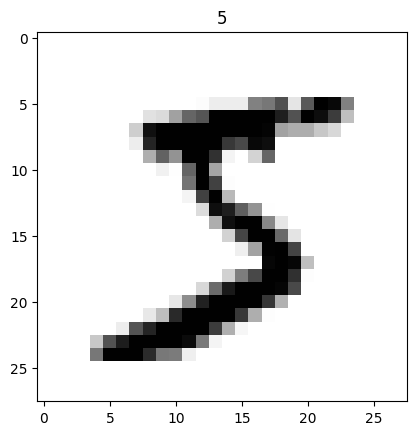

In [5]:
for i in range(1):
    plot_img(i)

preprocessing images

In [6]:
# Normalizing the image
'''
Converts pixel values from 0-255 (uint8) to 0.0-1.0 (float32).
This helps neural networks train faster and more accurately.
'''
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
print(len(X_train))

# expand the dimension to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

60000


In [7]:
# we have converted our class to one hot vector 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

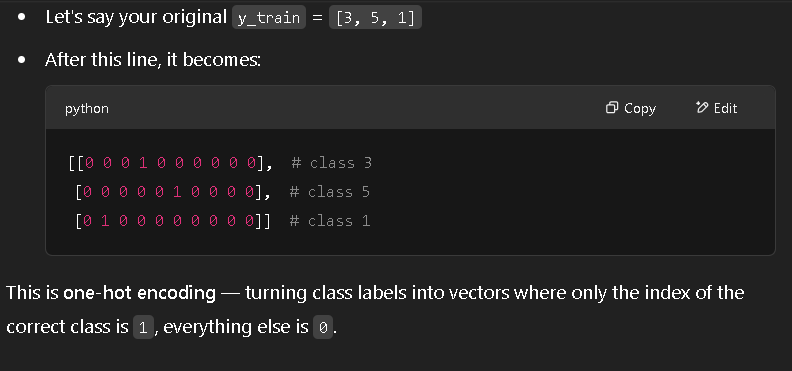

buidling the model

In [8]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = 'relu' ))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu' ))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


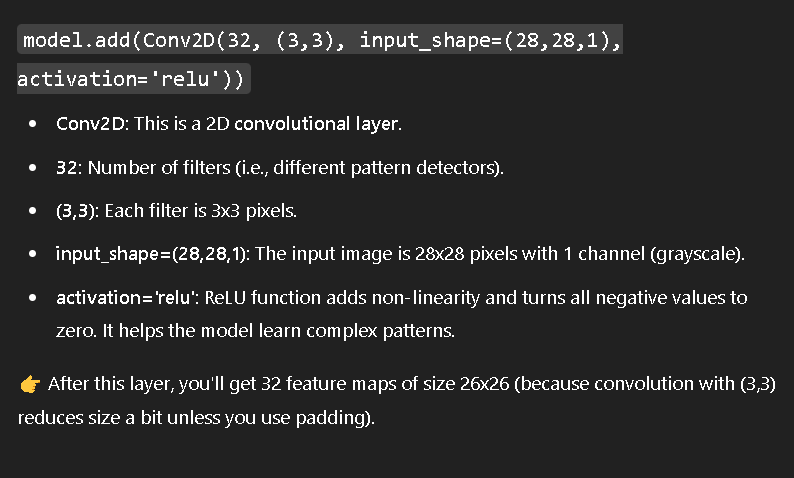
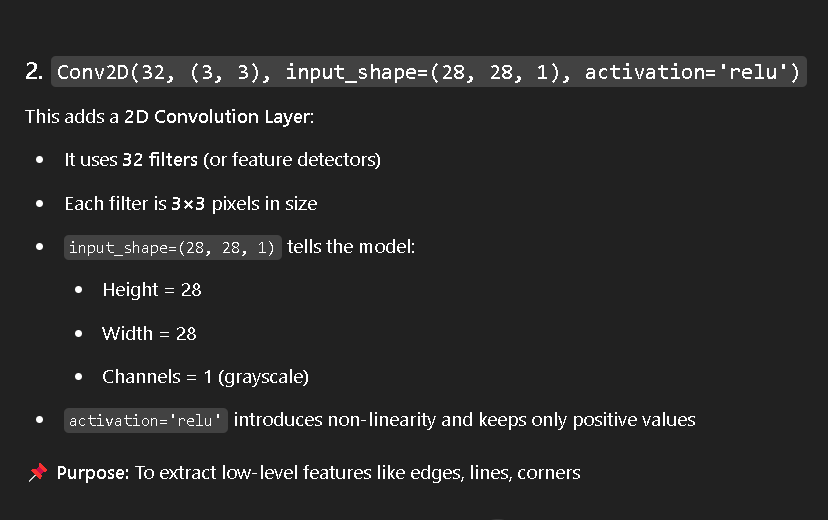
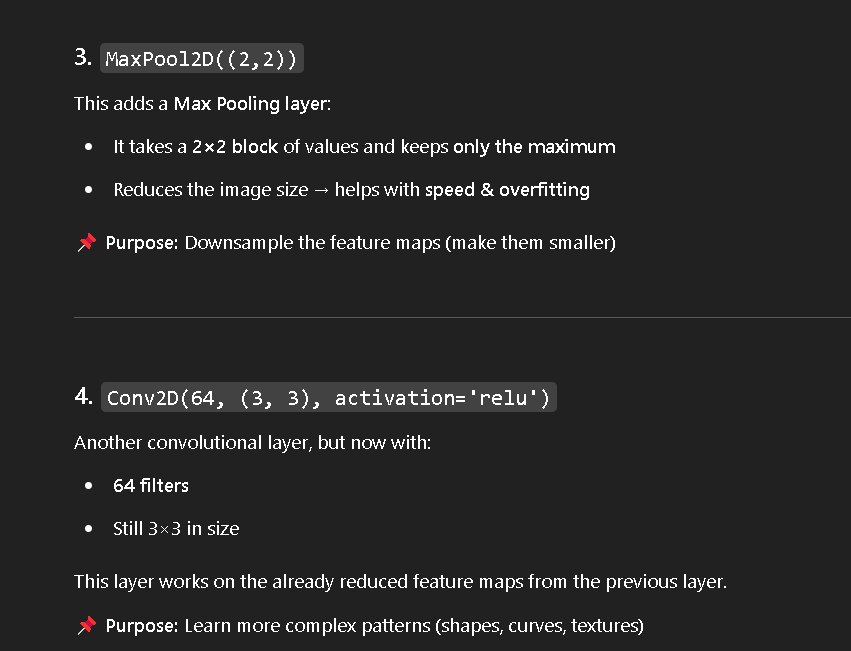
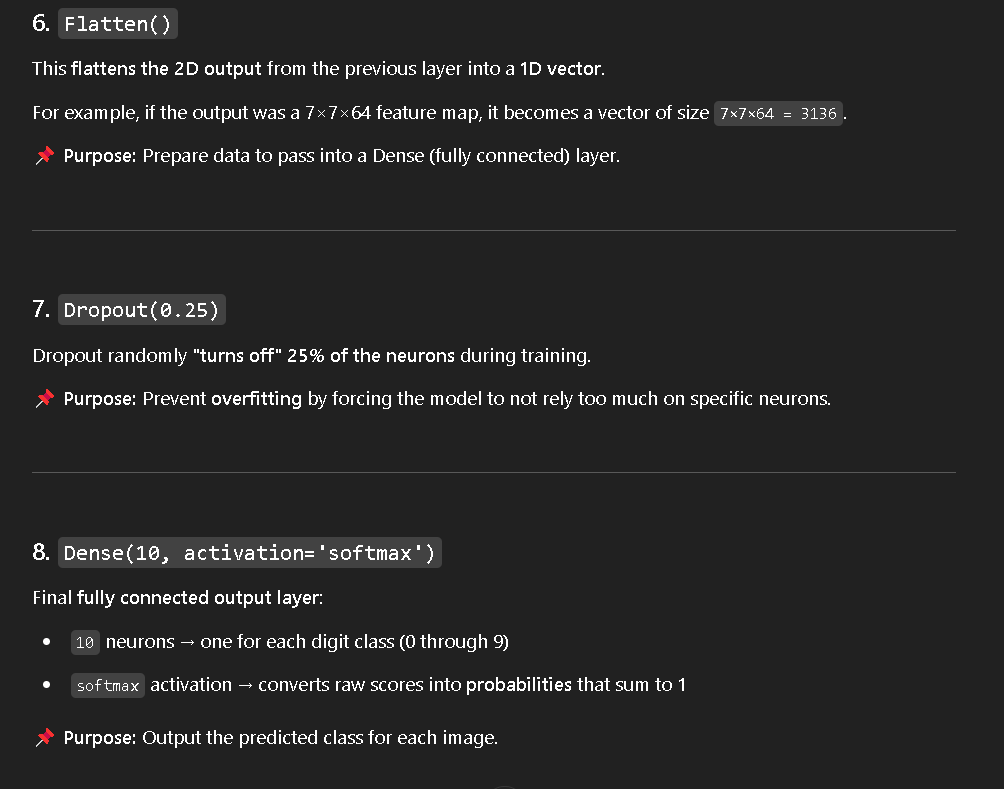
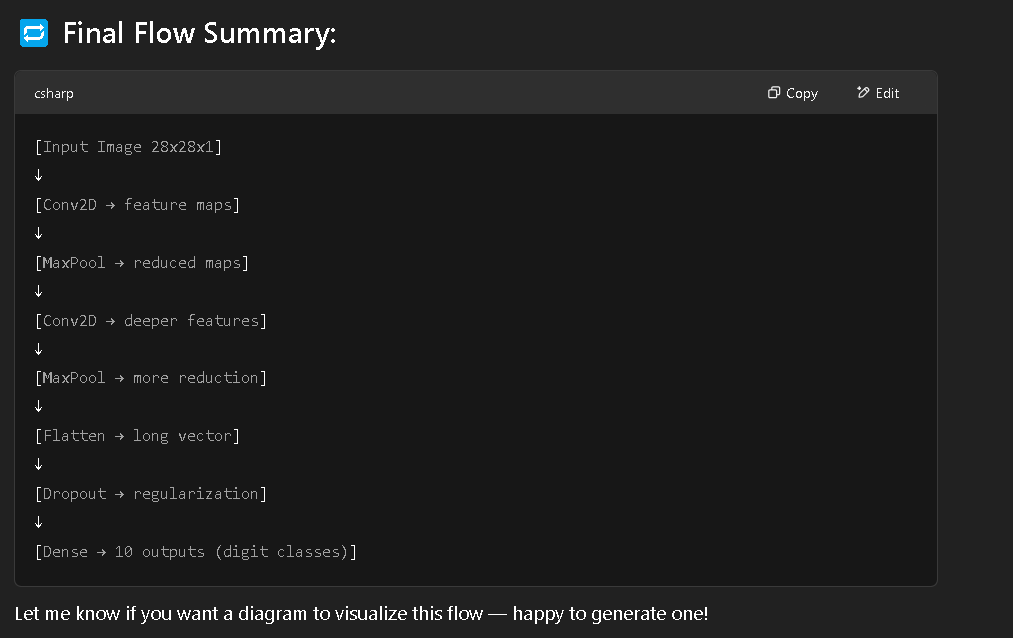
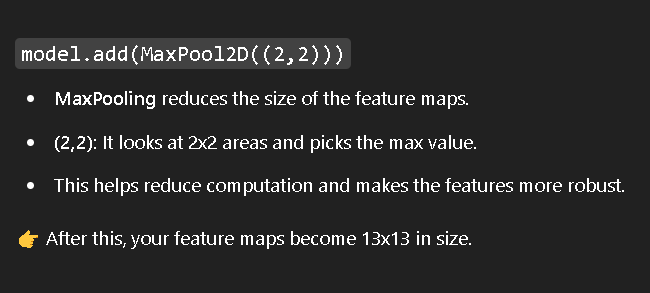
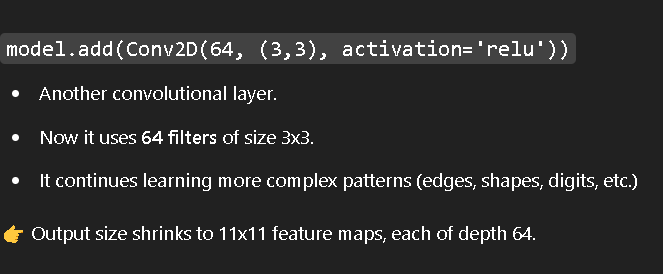
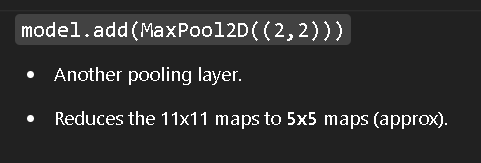
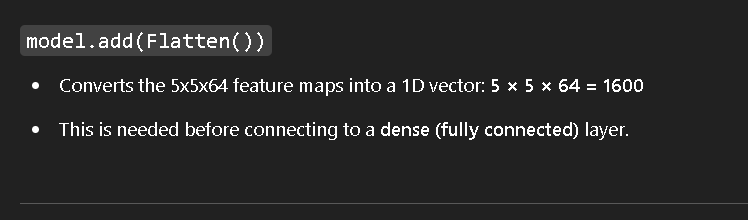
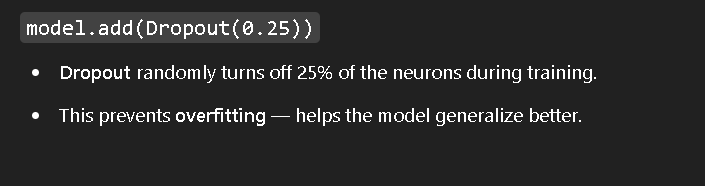
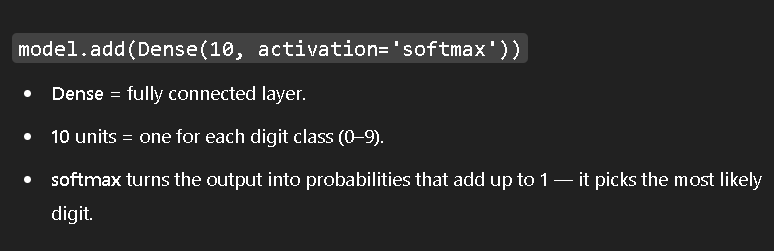

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

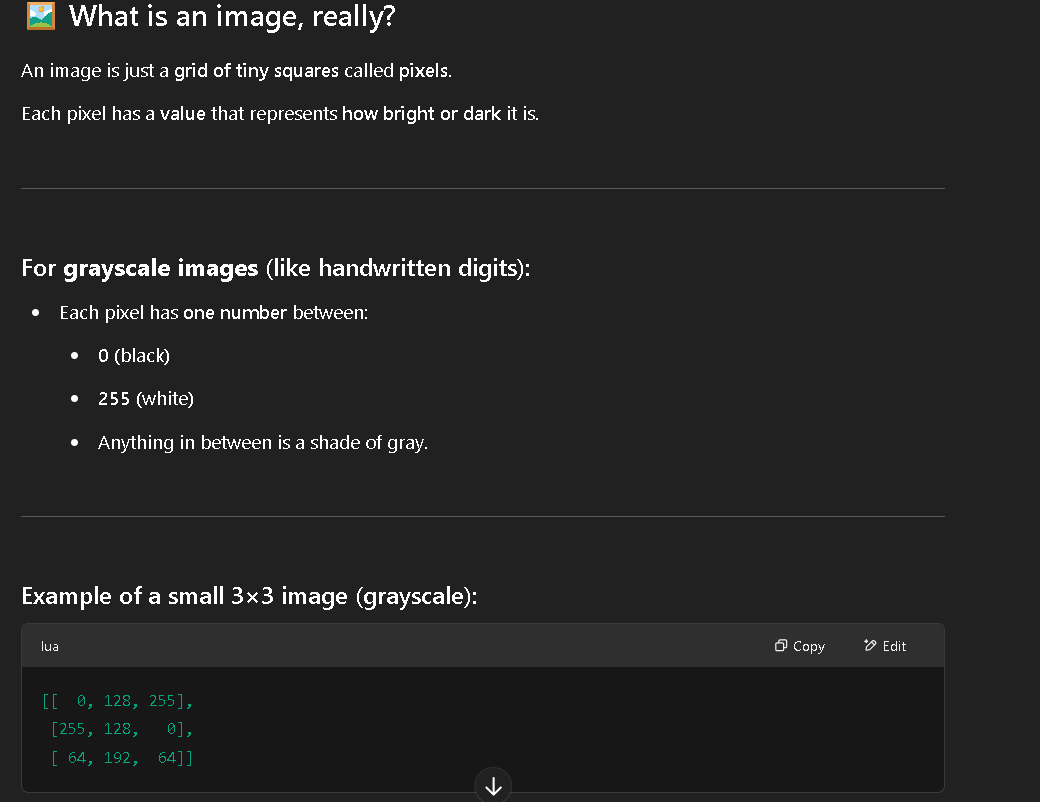
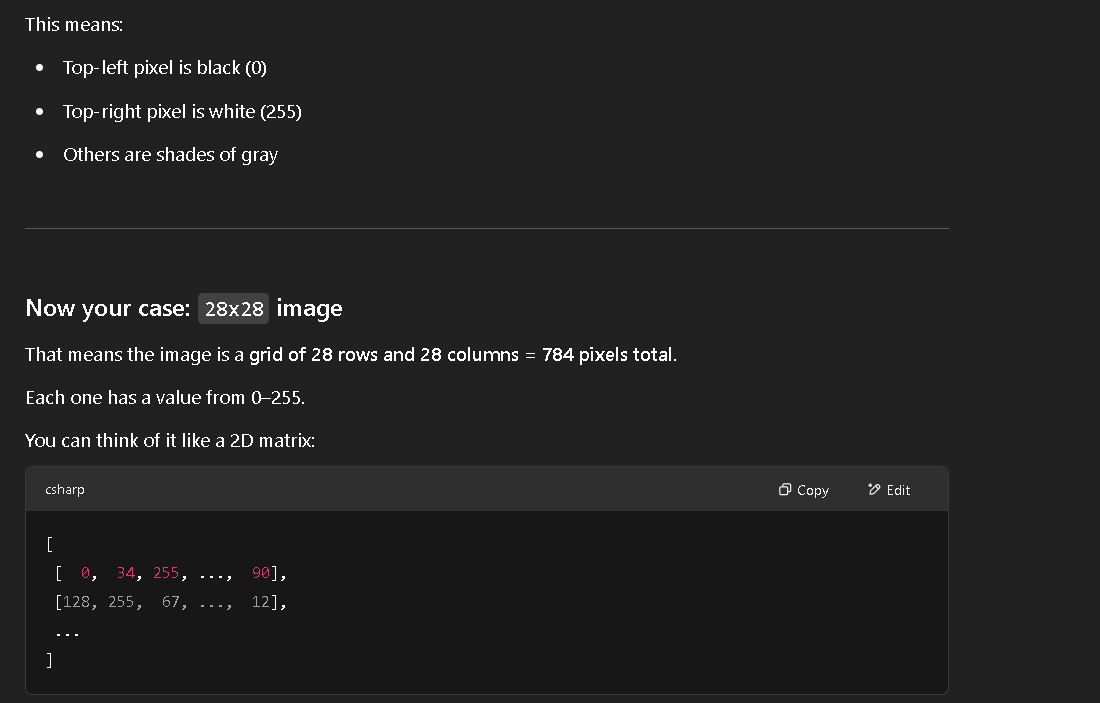
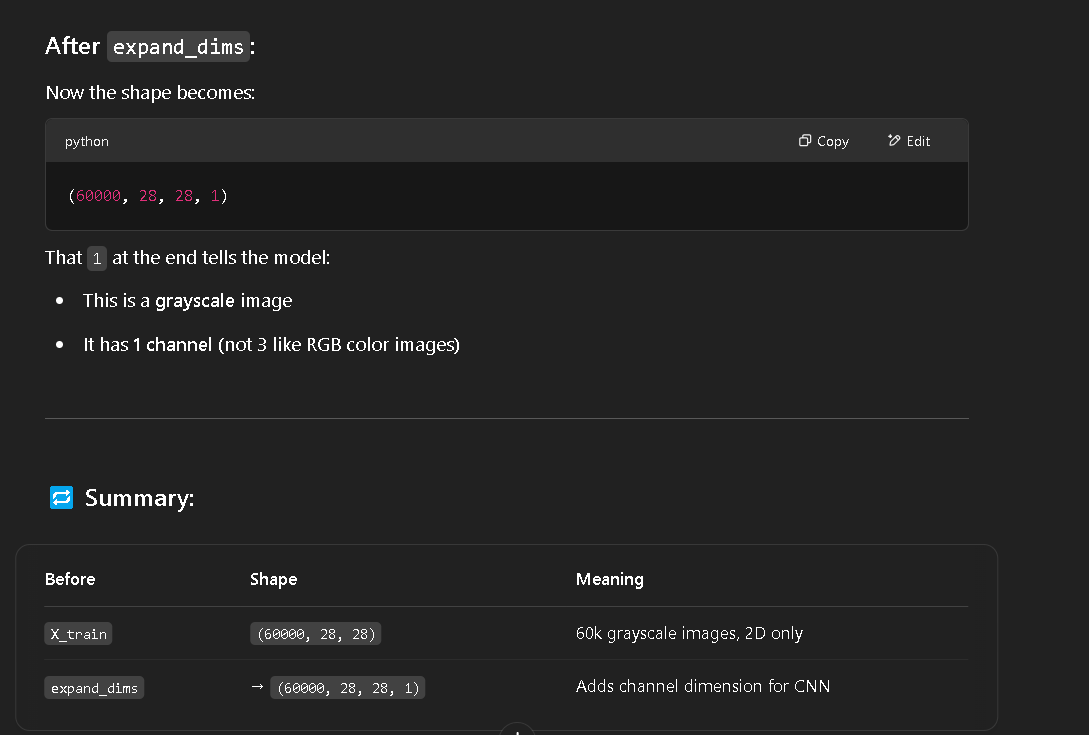
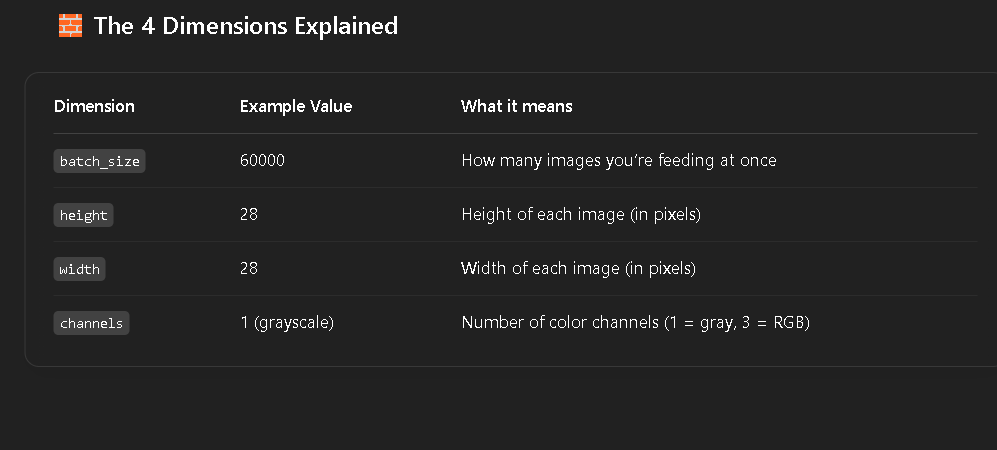
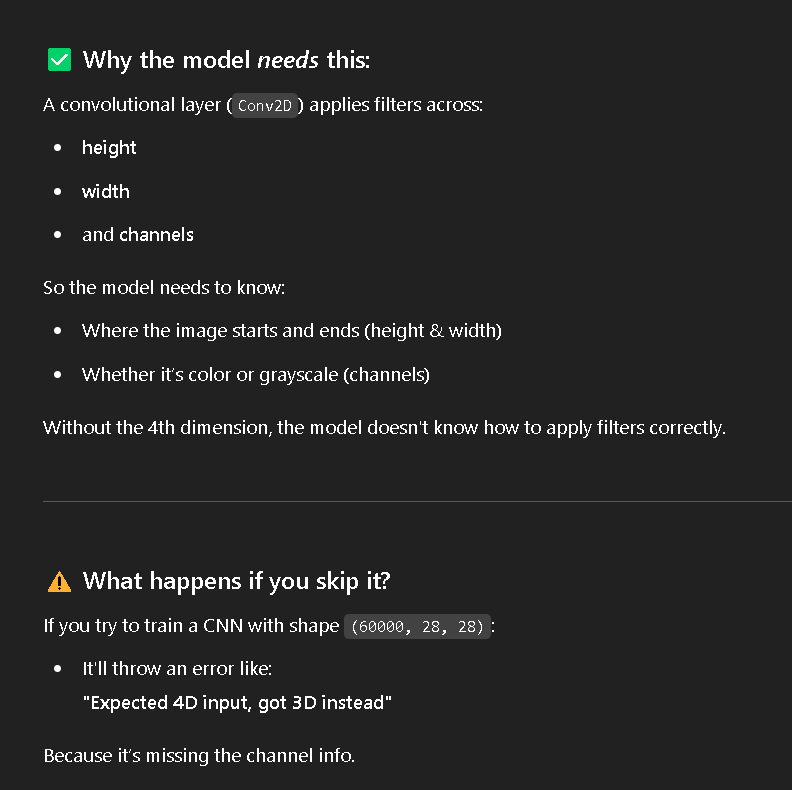
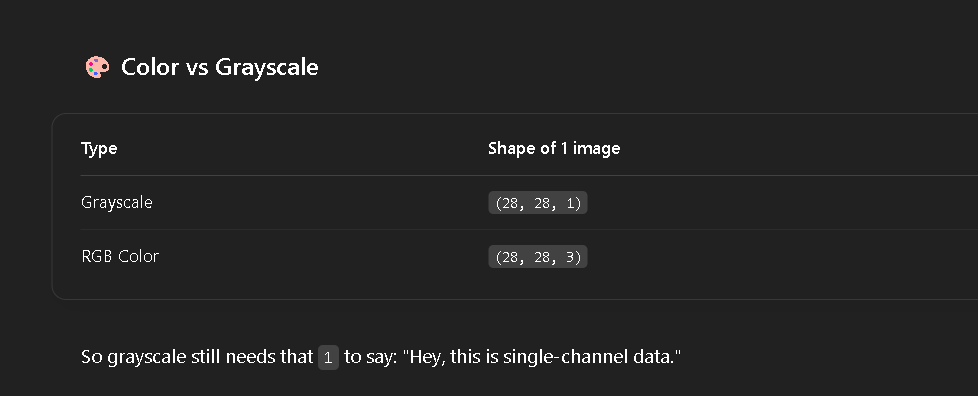

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

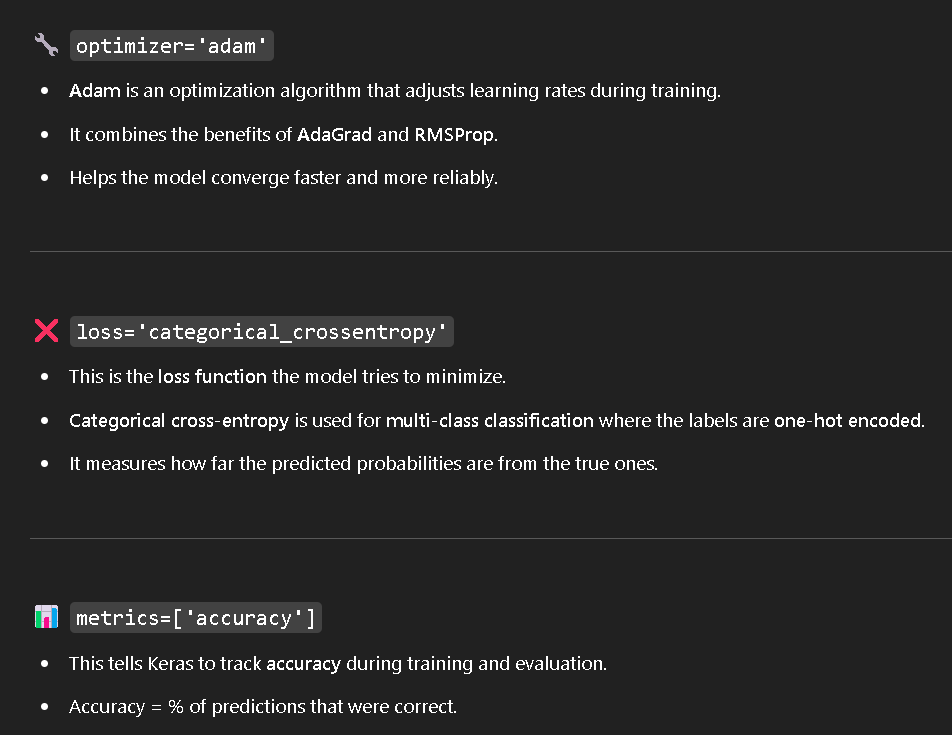

In [11]:
# calllbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# earlystopping

es = EarlyStopping(monitor = 'val_accuracy',min_delta = 0.01 , patience = 4 ,verbose =1)

# model checkpoint

mc = ModelCheckpoint(r'F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5',monitor = 'val_accuracy',verbose   =1 , save_best_only  = True)

cb = [es,mc]

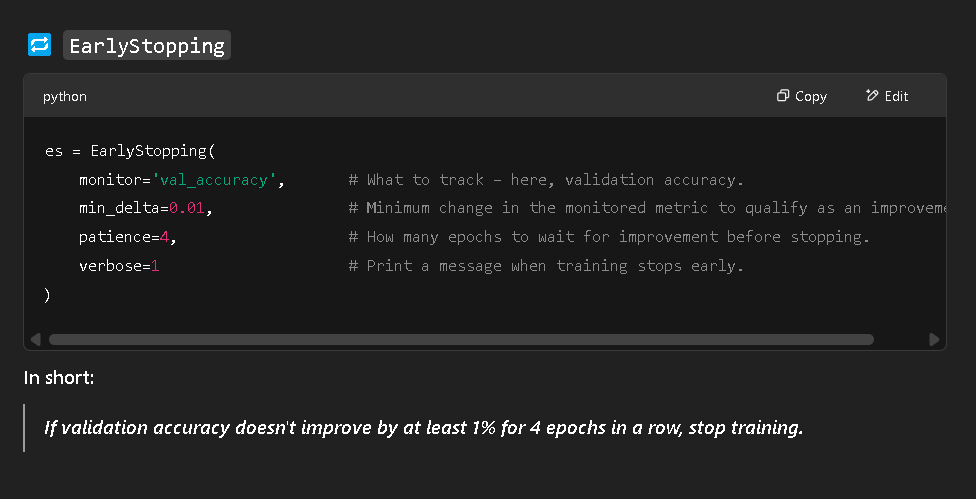
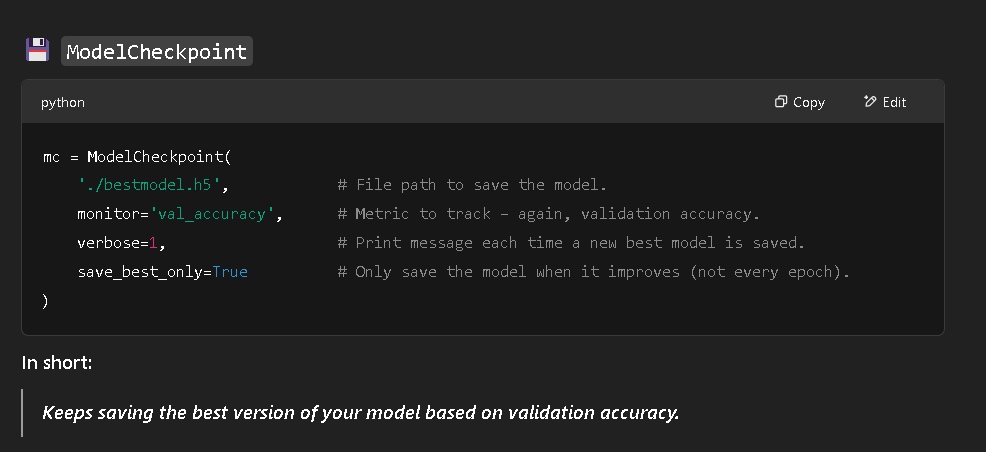

Model Training

In [12]:
his = model.fit(X_train,y_train,epochs=5,validation_split=0.3,callbacks=cb)

Epoch 1/5
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8604 - loss: 0.4700
Epoch 1: val_accuracy improved from -inf to 0.97872, saving model to F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8609 - loss: 0.4682 - val_accuracy: 0.9787 - val_loss: 0.0711
Epoch 2/5
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9770 - loss: 0.0743
Epoch 2: val_accuracy improved from 0.97872 to 0.98022, saving model to F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9770 - loss: 0.0743 - val_accuracy: 0.9802 - val_loss: 0.0646
Epoch 3/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9823 - loss: 0.0567
Epoch 3: val_accuracy improved from 0.98022 to 0.98461, saving model to F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9823 - loss: 0.0567 - val_accuracy: 0.9846 - val_loss: 0.0518
Epoch 4/5
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9865 - loss: 0.0420
Epoch 4: val_accuracy improved from 0.98461 to 0.98572, saving model to F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9857 - val_loss: 0.0480
Epoch 5/5
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9880 - loss: 0.0368
Epoch 5: val_accuracy improved from 0.98572 to 0.98856, saving model to F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9880 - loss: 0.0368 - val_accuracy: 0.9886 - val_loss: 0.0398
Epoch 5: early stopping


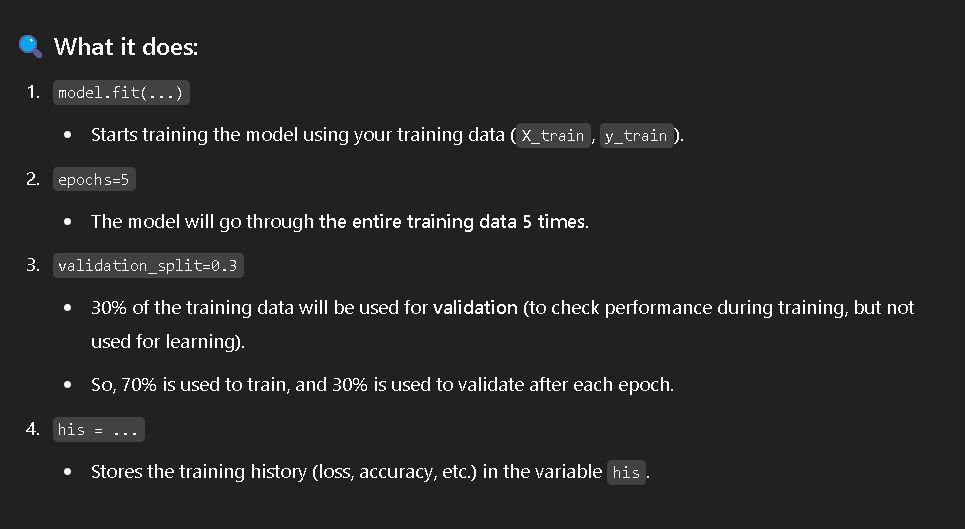

In [13]:
model_S = keras.models.load_model(r'F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5')

In [14]:
score = model_S.evaluate(X_test,y_test)
# 0 returns the loss
print(f'mode accuracy is {score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0397
mode accuracy is 0.9897000193595886
